In [2]:
# The code was removed by Watson Studio for sharing.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,16,2019-06-10,0.15,3,347
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,3,85,2019-05-05,0.73,1,203
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52098,-0.14002,Entire home/apt,300,3,41,2019-06-19,0.41,14,269
3,24328,Battersea bedroom & office w parking shared ga...,41759,Joe,NaN,Wandsworth,51.47298,-0.16376,Entire home/apt,175,30,93,2019-06-08,0.88,1,329
4,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,NaN,Wandsworth,51.44687,-0.21874,Entire home/apt,65,4,28,2019-06-22,0.69,1,2


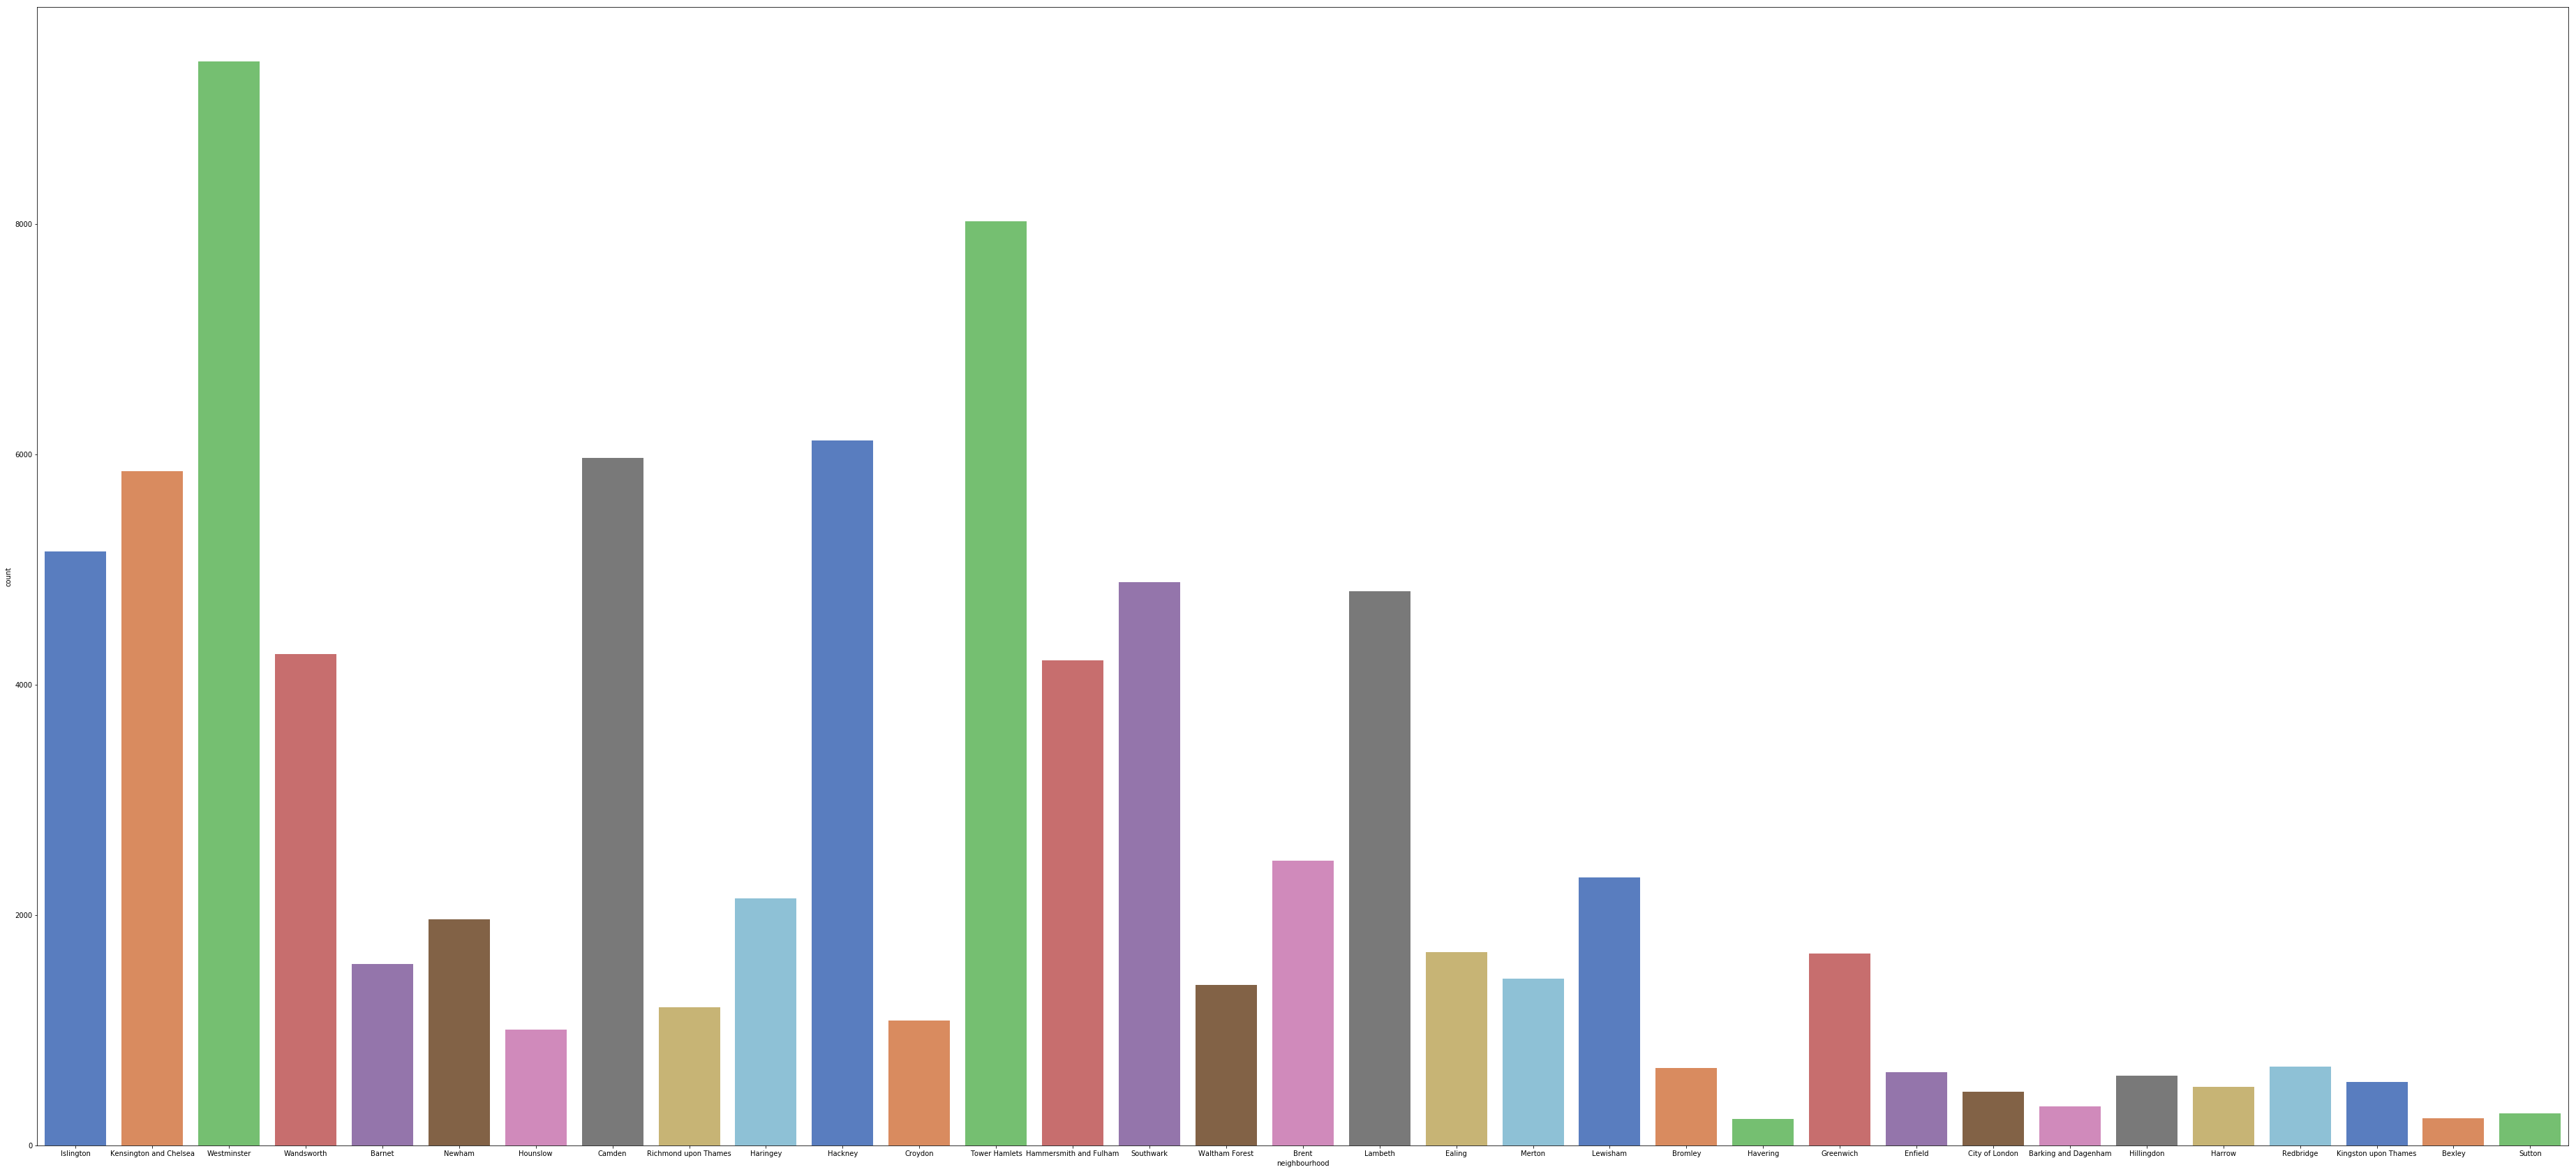

In [8]:
f,ax = plt.subplots(figsize=(65,30))
ax = sns.countplot(df_airbnb.neighbourhood,palette="muted")
plt.show()

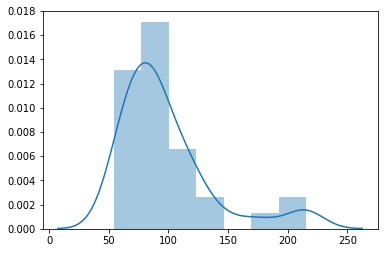

In [11]:
df1 = df_airbnb[['neighbourhood','price']]
d = df1.groupby('neighbourhood').mean()
sns.distplot(d)
plt.show()

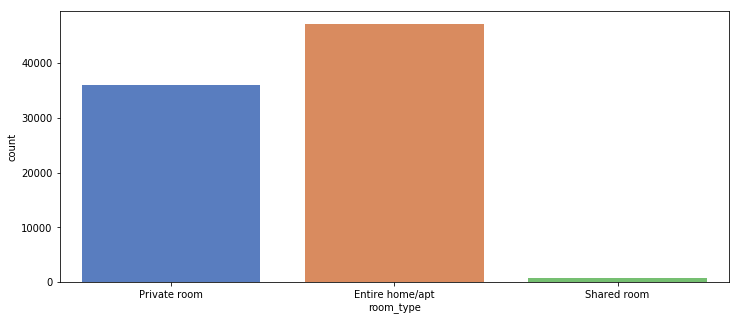

In [12]:
f,ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(df_airbnb.room_type,palette="muted")
plt.show()

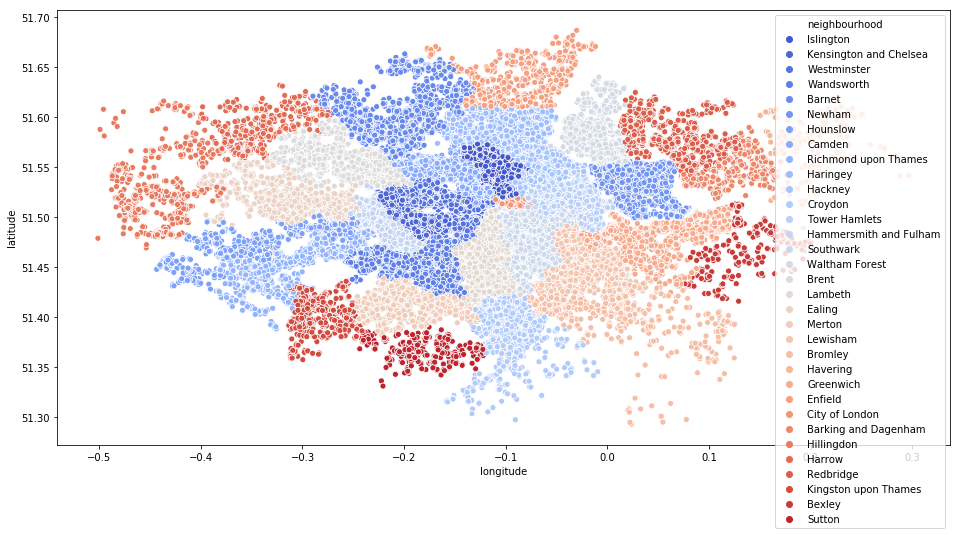

In [15]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df_airbnb.latitude,x=df_airbnb.longitude,hue=df_airbnb.neighbourhood,palette="coolwarm")
plt.show()

In [16]:
df_airbnb.drop(['id','host_id','host_name','name','latitude','longitude','room_type','neighbourhood_group','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365'], axis = 1, inplace = True)
df_airbnb = df_airbnb.groupby('neighbourhood')['price'].agg(np.mean)
df_airbnb = df_airbnb.to_frame().reset_index()
df_airbnb.head()

,neighbourhood,price
0,Barking and Dagenham,62.537092
1,Barnet,85.273304
2,Bexley,54.428571
3,Brent,89.313511
4,Bromley,63.606825


In [17]:
body = client_26bb3317bd9640e0b03aa179d9b14ee2.get_object(Bucket='airbnbandcrimeinlondon-donotdelete-pr-zjurqpdwkuwdtm',Key='MPS Borough Level Crime (most recent 24 months).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_crime = pd.read_csv(body)
df_crime.head()

,MajorText,MinorText,LookUp_BoroughName,201709,201710,201711,201712,201801,201802,201803,...,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908
0,Arson and Criminal Damage,Arson,Barking and Dagenham,8,7,7,4,2,3,6,...,5,1,5,2,5,5,11,3,5,3
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,134,132,108,119,135,111,115,...,105,88,97,127,137,130,138,113,134,106
2,Burglary,Burglary - Business and Community,Barking and Dagenham,25,23,27,21,38,33,38,...,39,33,45,24,29,27,22,27,31,35
3,Burglary,Burglary - Residential,Barking and Dagenham,81,122,88,124,143,134,122,...,106,164,114,107,99,96,114,96,71,64
4,Drug Offences,Drug Trafficking,Barking and Dagenham,6,7,5,6,4,5,7,...,7,2,5,1,6,4,8,6,7,6


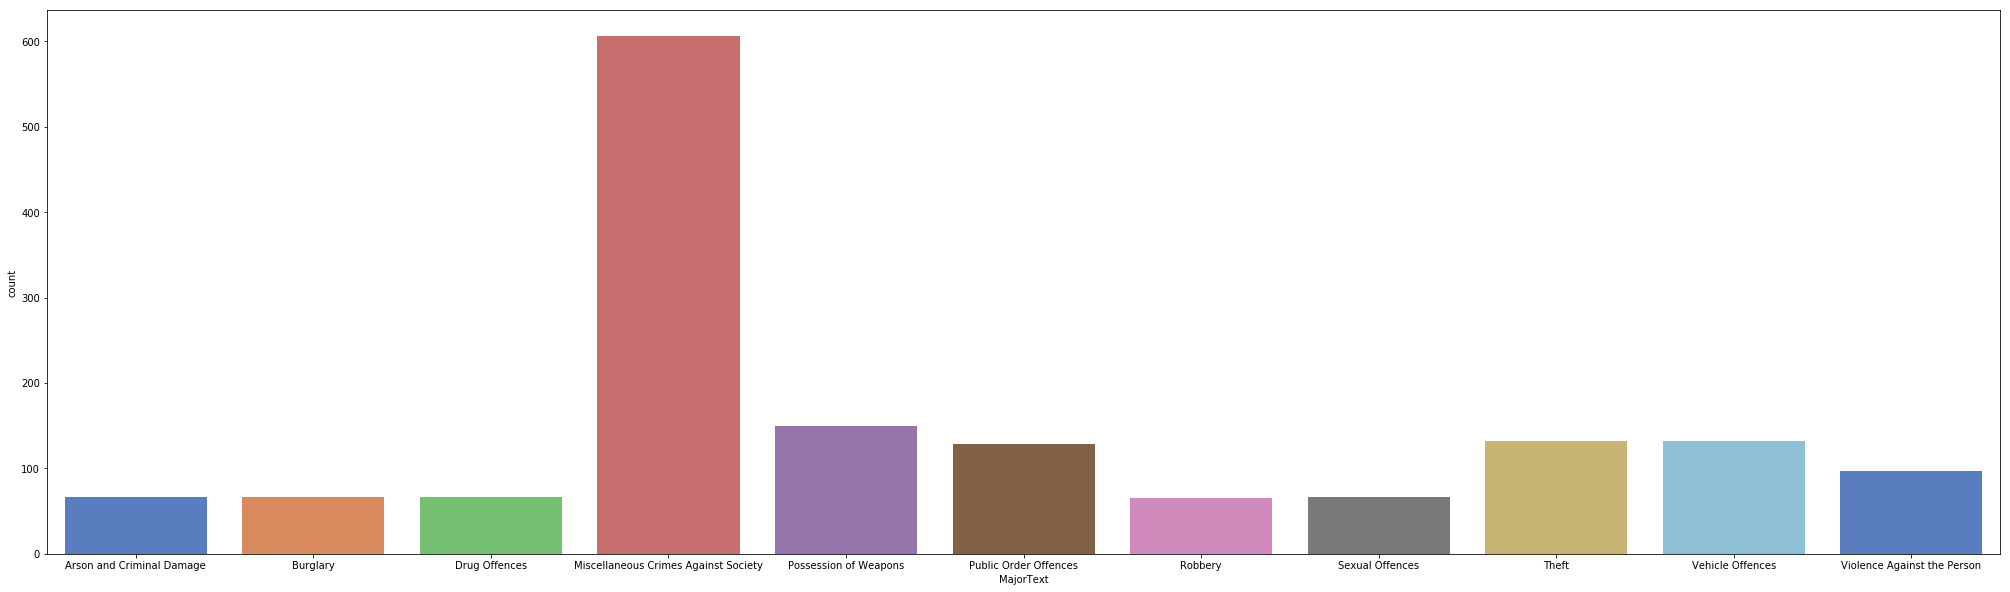

In [21]:
f,ax = plt.subplots(figsize=(35,10))
ax = sns.countplot(df_crime.MajorText,palette="muted")
plt.show()

In [24]:
df_crime['Total'] = df_crime.sum(axis = 1)
df_crime.drop(['MinorText','MajorText','201709','201710','201711','201712','201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812','201901','201902','201903','201904','201905','201906','201907','201908'], axis = 1, inplace = True)
df_crime.rename({'LookUp_BoroughName':'neighbourhood'}, axis = 1, inplace = True)
df_crime.head()

,neighbourhood,Total
0,Barking and Dagenham,123
1,Barking and Dagenham,2866
2,Barking and Dagenham,723
3,Barking and Dagenham,2461
4,Barking and Dagenham,140


In [25]:
#barking_crime = df_crime[df_crime['neighbourhood'] == 'Barking and Dagenham'].reset_index(drop = True)
#barking_crime.head()
df_crime = df_crime.groupby('neighbourhood').sum().reset_index()
df_crime.head()

,neighbourhood,Total
0,Barking and Dagenham,37775
1,Barnet,57989
2,Bexley,32407
3,Brent,61194
4,Bromley,46983


In [26]:
df_final = df_airbnb.merge(df_crime, on = 'neighbourhood')
df_final.rename({'Total':'crime_count'}, axis = 1, inplace = True)
print(df_final['price'].describe())
print(df_final['crime_count'].describe())
df_final['cheap'] = df_final['price'].apply(lambda x: 1 if x < 85 else 0)
df_final['safe'] = df_final['crime_count'].apply(lambda x: 1 if x < 52000 else 0)
df_final

count     32.000000
mean      95.436122
std       37.803579
min       54.428571
25%       71.773344
50%       85.753172
75%      109.840097
max      215.623101
Name: price, dtype: float64
count        32.000000
mean      53566.687500
std       21129.834119
min       25168.000000
25%       43464.500000
50%       52328.000000
75%       62819.500000
max      137193.000000
Name: crime_count, dtype: float64


,neighbourhood,price,crime_count,cheap,safe
0,Barking and Dagenham,62.537092,37775,1,1
1,Barnet,85.273304,57989,0,0
2,Bexley,54.428571,32407,1,1
3,Brent,89.313511,61194,0,0
4,Bromley,63.606825,46983,1,1
5,Camden,144.683311,74532,0,0
6,Croydon,63.325346,63013,1,0
7,Ealing,79.483929,58557,1,0
8,Enfield,62.815166,56384,1,0
9,Greenwich,81.760961,53021,1,0


In [27]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4)
y_pred = km.fit_predict(df_final[['cheap', 'safe']])
y_pred

array([2, 1, 2, 1, 2, 1, 3, 3, 3, 3, 1, 0, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1,
       0, 1, 2, 0, 1, 2, 1, 2, 0, 1], dtype=int32)

In [28]:
df_final['cluster'] = y_pred
df_final.drop(['cheap','safe'], axis = 1, inplace = True)
df_final

,neighbourhood,price,crime_count,cluster
0,Barking and Dagenham,62.537092,37775,2
1,Barnet,85.273304,57989,1
2,Bexley,54.428571,32407,2
3,Brent,89.313511,61194,1
4,Bromley,63.606825,46983,2
5,Camden,144.683311,74532,1
6,Croydon,63.325346,63013,3
7,Ealing,79.483929,58557,3
8,Enfield,62.815166,56384,3
9,Greenwich,81.760961,53021,3


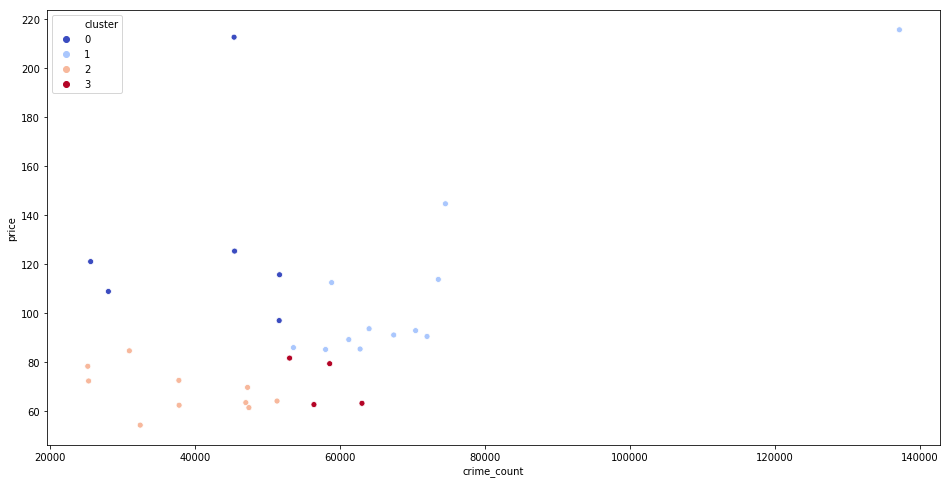

In [32]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df_final.price,x=df_final.crime_count,hue=df_final.cluster,palette="coolwarm")
plt.show()

In [31]:
df_cheap_safe = df_final[df_final.cluster == 2]
df_cheap_safe

,neighbourhood,price,crime_count,cluster
0,Barking and Dagenham,62.537092,37775,2
2,Bexley,54.428571,32407,2
4,Bromley,63.606825,46983,2
13,Harrow,84.727273,30907,2
14,Havering,72.678261,37742,2
15,Hillingdon,64.248764,51289,2
19,Kingston upon Thames,78.426497,25168,2
24,Redbridge,61.575802,47407,2
27,Sutton,72.425000,25281,2
29,Waltham Forest,69.818378,47221,2


In [34]:
df_cheap_unsafe = df_final[df_final.cluster == 3]
df_cheap_unsafe

,neighbourhood,price,crime_count,cluster
6,Croydon,63.325346,63013,3
7,Ealing,79.483929,58557,3
8,Enfield,62.815166,56384,3
9,Greenwich,81.760961,53021,3


In [36]:
df_expensive_safe = df_final[df_final.cluster == 0]
df_expensive_safe

,neighbourhood,price,crime_count,cluster
11,Hammersmith and Fulham,125.385127,45427,0
16,Hounslow,97.060697,51586,0
18,Kensington and Chelsea,212.600478,45361,0
22,Merton,108.935685,28012,0
25,Richmond upon Thames,121.109349,25564,0
30,Wandsworth,115.740028,51635,0


In [37]:
df_expensive_unsafe = df_final[df_final.cluster == 1]
df_expensive_unsafe

,neighbourhood,price,crime_count,cluster
1,Barnet,85.273304,57989,1
3,Brent,89.313511,61194,1
5,Camden,144.683311,74532,1
10,Hackney,93.740353,63996,1
12,Haringey,85.462436,62755,1
17,Islington,112.553336,58828,1
20,Lambeth,92.965259,70417,1
21,Lewisham,86.043909,53555,1
23,Newham,90.588595,71993,1
26,Southwark,113.843226,73551,1
